<a href="https://colab.research.google.com/github/NayanaPradeep/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM**

##  Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. 

## This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. 

##  Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? 

# **SOLUTION**

## **OVERVIEW**

In 2007 Brian Chesky and Joe Gebbia were broke and looking to raise money to make their rent in San Francisco. They decided to rent out air mattresses in their apartment to attendees of a conference because all the hotels were booked. They called their service “Air Bed and Breakfast.” In a few years, this small experiment would create the hotel industry disruptor Airbnb. The privately held company, with third co-founder Nathan Blecharczyk on board, now lists more than three million lodgings in nearly 200 countries. (source: https://knowledge.wharton.upenn.edu/article/the-inside-story-behind-the-unlikely-rise-of-airbnb/)

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.


##**IMPORTING THE LIBRARIES**

In [1]:
#importing necessary libraries for the dataset analysis
import numpy as np                                            # Computation on datasets
import pandas as pd                                           # Data processing, analysing and wrangling
import matplotlib.pyplot as plt                               # Data visualization --plotting
import matplotlib.image as mpimg                              # Data visualization --images
%matplotlib inline                                            
import seaborn as sns                                         # Data visualization --plotting

##**MOUNT THE DRIVE**

In [2]:
#Mount the drive to load the dataset 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**IMPORT THE DATASET**

In [4]:
# Read the Airbnb NYC 2019 dataset to start analyzing
file_path = '/content/drive/MyDrive/Colab Notebooks/Airbnb Bookings Analysis - Nayana Pradeep/Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(file_path)

##**ANALYZING THE DATA**

In [5]:
#Check the number of rows and columns in the dataset
airbnb_df.shape

(48895, 16)

In [6]:
#Total number of elements in the dataset
airbnb_df.size

782320

In [7]:
#Find the columns and datatypes in the dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#Checking if the id is unique or not
airbnb_df['id'].nunique()

48895

In [9]:
#Check some of the contents using head and tail functions
airbnb_df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
airbnb_df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [11]:
#Find the number of columns with null value for each column
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
#Total number of null values in the dataset
airbnb_df.isna().sum().sum()

20141

In [13]:
#Descriptive Statistic Summary
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [14]:
#Total number of neighbouhood listed in the dataset
airbnb_df.neighbourhood.nunique()

221

In [15]:
#Types of room available
airbnb_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

We can conclude the below details about the data from the primary checks performed above



 Below is a description of the columns/variables in Airbnb NYC data 

* id                                          ----Unique Listing ID             
* name                                        ----Listing Name 
* host_id                                     ----Host ID
* host_name                                   ----Host Name 
* neighbourhood_group                         ----Location
* neighbourhood                               ----Area.There are 221 unique neighbourhoods
* latitude                                    ----Latitude coordinates
* longitude                                   ----Longitude coordinates
* room_type                                   ----Type of room. Available types are Private room,Entire home/apt and Shared room
* price                                       ----Price 
* minimum_nights                              ----Minimum number of nights for which the booking is possible
* number_of_reviews                           ----Number of reviews
* last_review                                 ----Latest review
* calculated_host_listings_count              ----Number of listings per host
* availability_365                            ----Number of days for which the listing is available for booking





In [16]:
#Number of listings for each neighbourhood group
neighbourhood_host_listings=airbnb_df["neighbourhood_group"].value_counts()
neighbourhood_host_listings

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Manhattan has the most number of listings whereas Staten Island has the least. Now lets try to plot this information in graphical format.

Text(0.5, 0, 'Area/Neighbourhood Group')

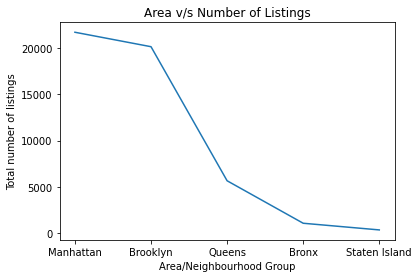

In [17]:
#Plot a graph for the area and number of listings for each area
plt.plot(neighbourhood_host_listings)
plt.title('Area v/s Number of Listings')
plt.ylabel('Total number of listings')
plt.xlabel('Area/Neighbourhood Group')

We have a column 'calculated_host_listings_count' for tracking the number of listings for each host. Does this mean we have  'calculated_host_listings_count' number of rows for corresponding hosts ? Lets find out.



As the first step, lets consider the 'calculated_host_listings_count' and find which host has 'calculated_host_listings_count' at its maximum.

In [18]:
#Copy the host_id and calculated_host_listing_count column to another data set and sort it descending order of calculated_host_listing_count
calculated_host_listing=airbnb_df[['host_id', 'calculated_host_listings_count']].sort_values('calculated_host_listings_count',ascending=False)

#Remove all the duplicates to make the dataframe simpler
calculated_host_listing.drop_duplicates()

,host_id,calculated_host_listings_count
39773,219517861,327
38701,107434423,232
13039,30283594,121
42840,137358866,103
33464,12243051,96
...,...,...
18593,91292951,1
18594,91381742,1
18595,12061634,1
18596,91393670,1


Next step is to find the number of rows with listing details are available for each host. We can easily find this by using the value_counts function

In [19]:
#Find the number of records with each host_id 
airbnb_df["host_id"].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

It is clear from the last two same outputs that the 'calculated_host_listings_count' keep track of the number of listings for each of the host.This would mean that the calculated_host_listings_count would be same for a particular host irrespective of the other attributes.

Now that it is confirmed that we can easily use the calculated_host_listings_count to check the number of listings for each host, lets do that.

From above outputs , we can see that host_id 219517861 has the maximum number of listing which is 327

In [23]:
#airbnb_df[airbnb_df["calculated_host_listings_count"]==219517861]
airbnb_df[airbnb_df["calculated_host_listings_count"]==airbnb_df["calculated_host_listings_count"].max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327


Now let's delve into the latitude and longitude aspects of the listings

Text(0.5, 1.0, 'Location Co-ordinates')

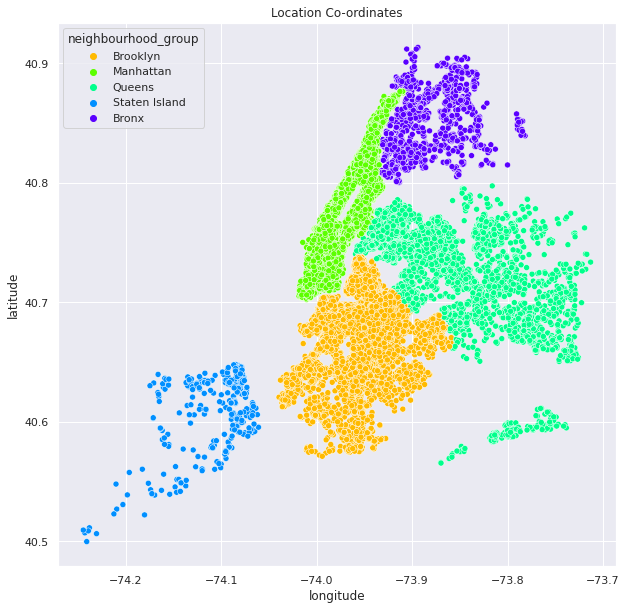

In [24]:
sns.set(rc={"figure.figsize": (10, 10)})
ax= sns.scatterplot(data=airbnb_df, x="longitude", y="latitude",hue='neighbourhood_group',palette='gist_rainbow')
ax.set_title('Location Co-ordinates')